# Results Visualisation 

In [1]:
import matplotlib.pyplot as plt
import os
import pandas as pd

In [2]:
MSE_Site_groups = dict({'Desert_chenopod' : [1.25, 36.349],
     'Temp/Med_Tree' : [1.433, 22.318],
     'Temp/Med_Tussock_grass' : [2.822, 37.161],
     'Desert_Forb' : [2.185, 45.156],
     'Tropical_Savanna_Tussock_grass': [2.391, 51.147],
     'Desert_Tussock_grass': [1.478, 43.869],
     'Tropical_Savanna_Tree': [1.322, 22.4],
     'Desert_Shrub' : [1.028, 29.621],
     'Desert_Hummock_grass' : [0.742, 46.772],
     'Temp/Med_Shrub' : [1.54, 22.815],
     'Desert_Tree' : [1.006, 26.623]})

In [3]:
data_group = pd.DataFrame(MSE_Site_groups).T.rename(columns = {0:'train', 1:'test'})

In [4]:
data_group['vegetation_type'] = [i.split('_')[-1] for i in data_group.index]

sorting_value = []
for i in data_group['vegetation_type'].values:
    i = i.lower()
    if i == 'tree':
        sorting_value.append(0)
    elif i == 'shrub':
        sorting_value.append(1)
    elif i == 'grass':
        sorting_value.append(2)
    else: 
        sorting_value.append(3)

data_group['sorting'] = sorting_value
data_group = data_group.sort_values('sorting')

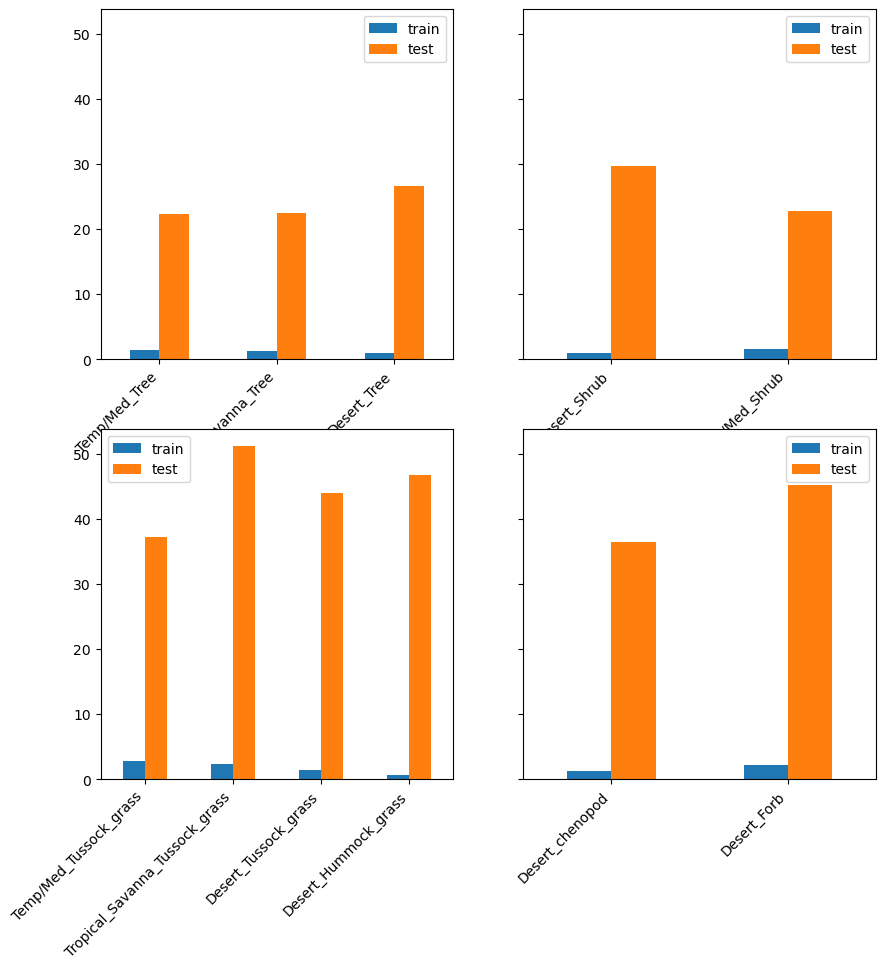

In [5]:

fig, ax = plt.subplots(2,2, figsize = (10,10), sharey = True)

c = 0
for i in range(2):
    for j in range(2):
        subset = data_group.loc[data_group['sorting'] == c]
        subset.plot.bar(ax = ax[i][j], y = ['train', 'test'])
        ax[i][j].set_xticklabels(subset.index, rotation=45, ha='right')
        c += 1

[Text(0, 0.5, 'MSE')]

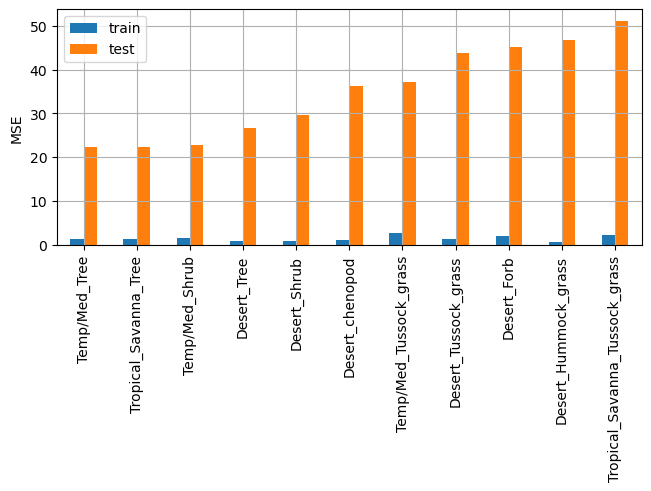

In [6]:

fig, ax = plt.subplots(1, layout='constrained')
data_group = data_group.sort_values('test')
data_group.plot.bar(y = ['train', 'test'], ax = ax)
ax.grid(True)
ax.set(ylabel='MSE')

In [7]:
data_group['train'].mean()

1.5633636363636365

In [8]:
data_group['test'].max()

51.147

In [9]:
data_group

,train,test,vegetation_type,sorting
Temp/Med_Tree,1.433,22.318,Tree,0
Tropical_Savanna_Tree,1.322,22.400,Tree,0
Temp/Med_Shrub,1.540,22.815,Shrub,1
Desert_Tree,1.006,26.623,Tree,0
Desert_Shrub,1.028,29.621,Shrub,1
Desert_chenopod,1.250,36.349,chenopod,3
Temp/Med_Tussock_grass,2.822,37.161,grass,2
Desert_Tussock_grass,1.478,43.869,grass,2
Desert_Forb,2.185,45.156,Forb,3
Desert_Hummock_grass,0.742,46.772,grass,2
